### Largest Companies in World 

This is a interesting dataset about the Largest Companies in the World, they are measured by Revenue, Profits, Assets and Market Value. It is from https://www.kaggle.com/datasets/jasmeet0516/largest-companies-in-world, and was updated one month ago. 

During the process of data cleaning I found some missing and duplicated values, my approach for each situation is mentioned before the corresponding codes. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

In [2]:
df = pd.read_csv('Largest companies in world.csv')

In [3]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.93 B,41.8 B,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47 B,156.36 B,660.99 B,"2,055.22 B"
2,3,ICBC,China,216.77 B,52.47 B,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,203.08 B,48.25 B,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,186.14 B,37.92 B,"5,356.86 B",141.82 B


In [4]:
df.tail()

,rank,organizationName,country,revenue,profits,assets,marketValue
2046,"1,996",Alfa Laval,Sweden,5.35 B,489.5 M,7.82 B,15.6 B
2047,"1,996",Gap,United States,15.62 B,-202 M,11.39 B,3.17 B
2048,"1,996",Yes Bank,India,3.34 B,91.6 M,43.22 B,5.6 B
2049,"1,999",BEKB-BCBE,Switzerland,556 M,167.1 M,42.97 B,2.49 B
2050,"1,999",Ipsen,France,3.18 B,681.7 M,5.99 B,10.21 B


The code info, shows some columns with missing values. So, I dropped them. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rank              2050 non-null   object
 1   organizationName  2050 non-null   object
 2   country           2050 non-null   object
 3   revenue           2049 non-null   object
 4   profits           2049 non-null   object
 5   assets            2049 non-null   object
 6   marketValue       2049 non-null   object
dtypes: object(7)
memory usage: 112.3+ KB


In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rank              2049 non-null   object
 1   organizationName  2049 non-null   object
 2   country           2049 non-null   object
 3   revenue           2049 non-null   object
 4   profits           2049 non-null   object
 5   assets            2049 non-null   object
 6   marketValue       2049 non-null   object
dtypes: object(7)
memory usage: 128.1+ KB


Here, I needed to replace some object datatypes with float values in the columns Profits, Assets, MarketValue, and Revenue. Since I couldn't plot graphics using object values, the code below checks if the value is already a float, and if not, transforms it into a float.

In [8]:
def convert_to_common_unit(value):
    if isinstance(value, float):  
        return value
    elif 'B' in value:  
        return float(value.replace('B', '').replace(',', '')) * 1000000000  
    elif 'M' in value: 
        return float(value.replace('M', '').replace(',', '')) * 1000000  
    else:
        return float(value.replace(',', ''))  

df['profits'] = df['profits'].apply(convert_to_common_unit)
df['assets'] = df['assets'].apply(convert_to_common_unit)
df['marketValue'] = df['marketValue'].apply(convert_to_common_unit)
df['revenue'] = df['revenue'].apply(convert_to_common_unit)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              2049 non-null   object 
 1   organizationName  2049 non-null   object 
 2   country           2049 non-null   object 
 3   revenue           2049 non-null   float64
 4   profits           2049 non-null   float64
 5   assets            2049 non-null   float64
 6   marketValue       2049 non-null   float64
dtypes: float64(4), object(3)
memory usage: 128.1+ KB


This code checks if there are duplicated rows. If it has, it drops them.

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1999 non-null   object 
 1   organizationName  1999 non-null   object 
 2   country           1999 non-null   object 
 3   revenue           1999 non-null   float64
 4   profits           1999 non-null   float64
 5   assets            1999 non-null   float64
 6   marketValue       1999 non-null   float64
dtypes: float64(4), object(3)
memory usage: 124.9+ KB


This first graphic is to dem

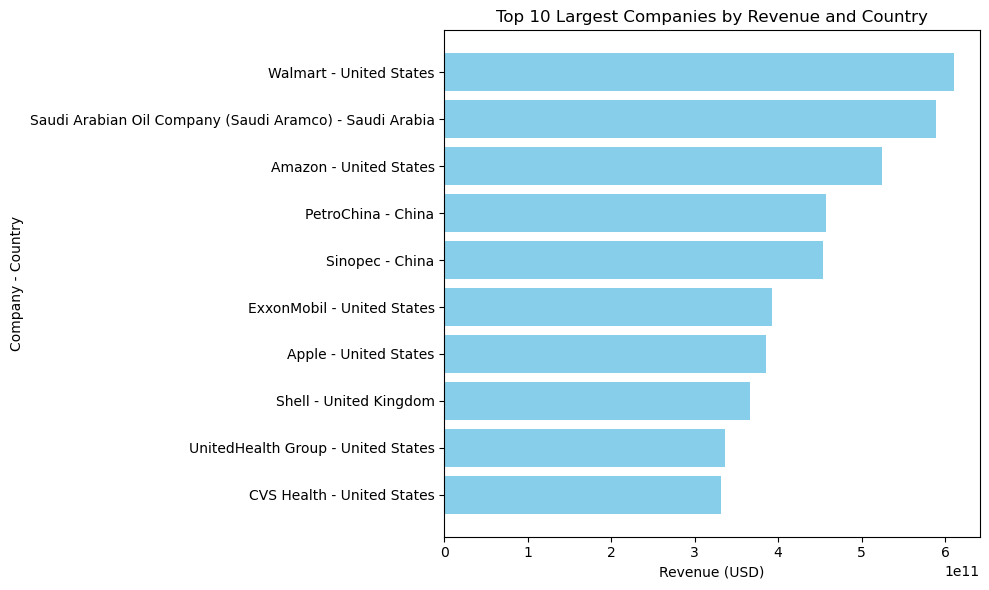

In [12]:
# Group by 'organizationName' and 'country', summing the revenue for each company in each country
top_companies_by_country = df.groupby(['organizationName', 'country'])['revenue'].sum().reset_index()

# Sort the DataFrame by revenue in descending order
top_companies_by_country = top_companies_by_country.sort_values(by='revenue', ascending=False)

# Select the top 10 largest companies by revenue and country
top_10_by_country = top_companies_by_country.head(10)

# Plot the top 10 largest companies by revenue and country
plt.figure(figsize=(10, 6))
plt.barh(top_10_by_country['organizationName'] + ' - ' + top_10_by_country['country'],
         top_10_by_country['revenue'], color='skyblue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Company - Country')
plt.title('Top 10 Largest Companies by Revenue and Country')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest revenue at the top
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

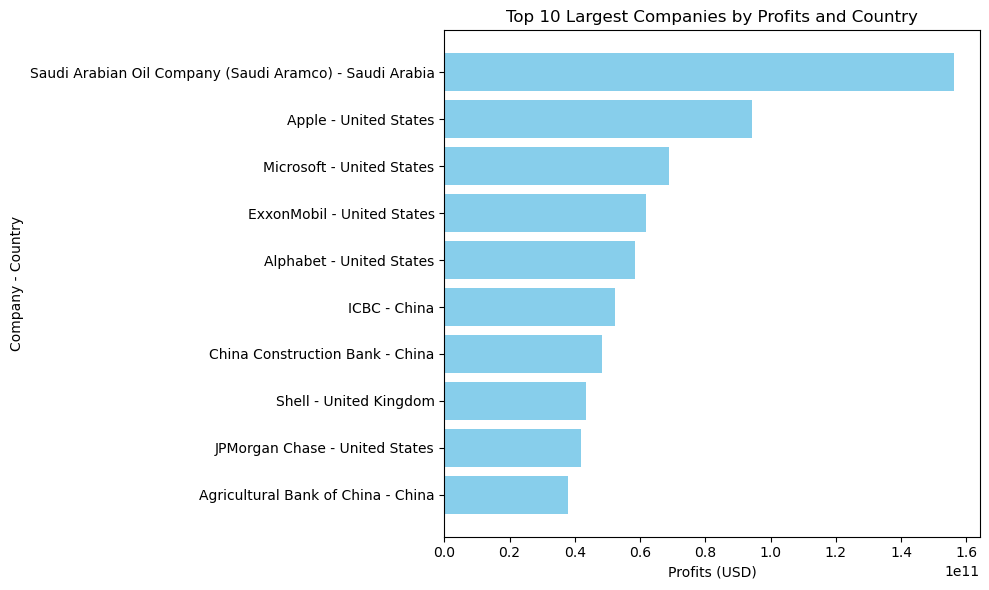

In [13]:
# Group by 'organizationName' and 'country', summing the revenue for each company in each country
top_companies_by_country = df.groupby(['organizationName', 'country'])['profits'].sum().reset_index()

# Sort the DataFrame by revenue in descending order
top_companies_by_country = top_companies_by_country.sort_values(by='profits', ascending=False)

# Select the top 10 largest companies by revenue and country
top_10_by_country = top_companies_by_country.head(10)

# Plot the top 10 largest companies by revenue and country
plt.figure(figsize=(10, 6))
plt.barh(top_10_by_country['organizationName'] + ' - ' + top_10_by_country['country'],
         top_10_by_country['profits'], color='skyblue')
plt.xlabel('Profits (USD)')
plt.ylabel('Company - Country')
plt.title('Top 10 Largest Companies by Profits and Country')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest revenue at the top
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

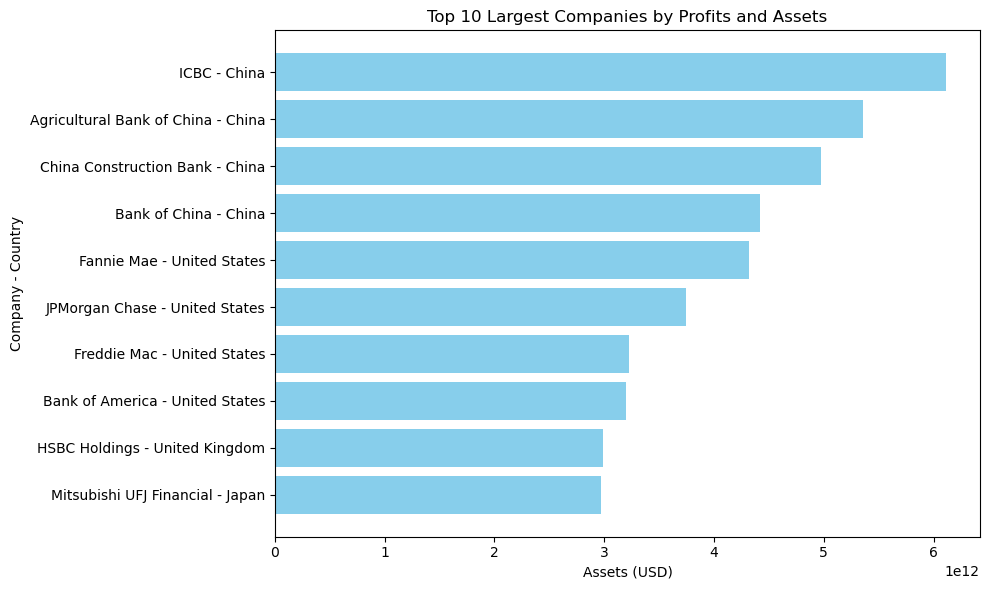

In [14]:
# Group by 'organizationName' and 'country', summing the revenue for each company in each country
top_companies_by_country = df.groupby(['organizationName', 'country'])['assets'].sum().reset_index()

# Sort the DataFrame by revenue in descending order
top_companies_by_country = top_companies_by_country.sort_values(by='assets', ascending=False)

# Select the top 10 largest companies by revenue and country
top_10_by_country = top_companies_by_country.head(10)

# Plot the top 10 largest companies by revenue and country
plt.figure(figsize=(10, 6))
plt.barh(top_10_by_country['organizationName'] + ' - ' + top_10_by_country['country'],
         top_10_by_country['assets'], color='skyblue')
plt.xlabel('Assets (USD)')
plt.ylabel('Company - Country')
plt.title('Top 10 Largest Companies by Profits and Assets')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest revenue at the top
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

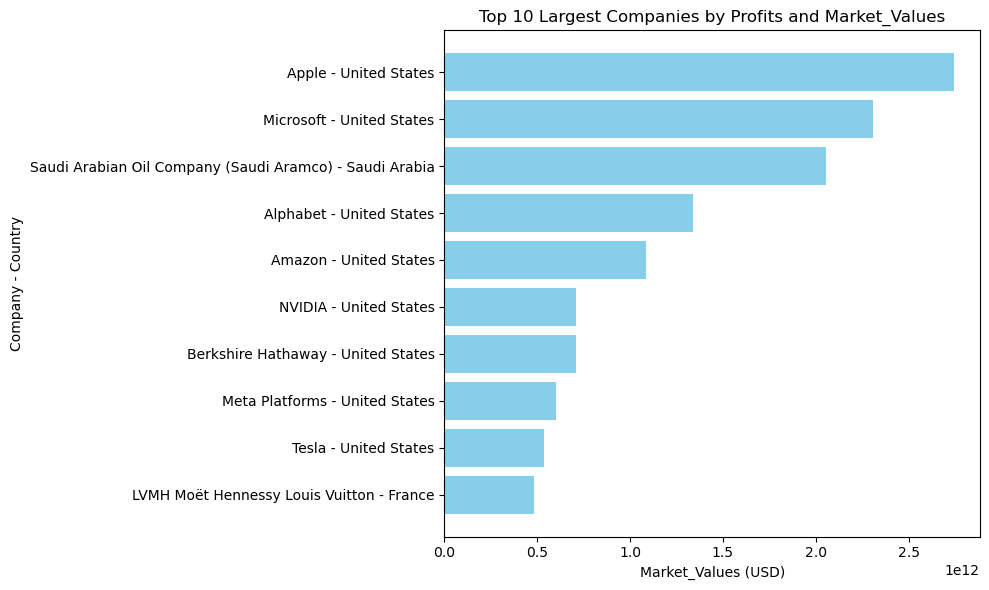

In [58]:
# Group by 'organizationName' and 'country', summing the revenue for each company in each country
top_companies_by_country = df.groupby(['organizationName', 'country'])['marketValue'].sum().reset_index()

# Sort the DataFrame by revenue in descending order
top_companies_by_country = top_companies_by_country.sort_values(by='marketValue', ascending=False)

# Select the top 10 largest companies by revenue and country
top_10_by_country = top_companies_by_country.head(10)

# Plot the top 10 largest companies by revenue and country
plt.figure(figsize=(10, 6))
plt.barh(top_10_by_country['organizationName'] + ' - ' + top_10_by_country['country'],
         top_10_by_country['marketValue'], color='skyblue')
plt.xlabel('Market_Values (USD)')
plt.ylabel('Company - Country')
plt.title('Top 10 Largest Companies by Profits and Market_Values')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest revenue at the top
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()